- USING THE PREPROCESSED DATASET WITH 561 FEATURES 
- TRAINING MODELS ON THIS DATASET 
- COMPARING AND PLOTTING THE RESULTS 

## IMPORTING LIBRARY 


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, f1_score, recall_score, precision_score,
    classification_report, confusion_matrix
)

# ML models
from sklearn.svm import LinearSVC
from sklearn.ensemble import (
    GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier,
    RandomForestClassifier, AdaBoostClassifier
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier


## LOADING THE DATA 

In [7]:
# Define base path
base_path = "/Users/priyam/paper_recreation/HAR MODEL_OPTIMIZATION/UCI HAR Dataset"

X_train= pd.read_csv(os.path.join(base_path, "train", "X_train.csv"), delim_whitespace=True, header=None)
y_train = pd.read_csv(os.path.join(base_path, "train", "y_train.csv"), delim_whitespace=True, header=None)
X_test = pd.read_csv(os.path.join(base_path, "test", "X_test.csv"), delim_whitespace=True, header=None)
y_test = pd.read_csv(os.path.join(base_path, "test", "y_test.csv"), delim_whitespace=True, header=None)
features = pd.read_csv(os.path.join(base_path, "features.txt"), delim_whitespace=True, header=None)
# attach feature names
X_train.columns = features[1].values
X_test.columns = features[1].values

/var/folders/z6/4z3b7f1d38db3t0frgwjyknh0000gn/T/ipykernel_42781/3275480567.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train= pd.read_csv(os.path.join(base_path, "train", "X_train.csv"), delim_whitespace=True, header=None)
/var/folders/z6/4z3b7f1d38db3t0frgwjyknh0000gn/T/ipykernel_42781/3275480567.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_train = pd.read_csv(os.path.join(base_path, "train", "y_train.csv"), delim_whitespace=True, header=None)
/var/folders/z6/4z3b7f1d38db3t0frgwjyknh0000gn/T/ipykernel_42781/3275480567.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv(os.path.join(base_path, "test", "X_test.csv"), delim_whitespace=True, header=None)
/var/

In [8]:
X_train.head(2)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317


In [10]:
y_train.head(2)

,0
0,5
1,5


## model directory

In [11]:
# Dictionary of models
models = {
    "Linear_SVC": LinearSVC(max_iter=10000),
    "Gradient_Boosting": GradientBoostingClassifier(),
    "Extra_Trees": ExtraTreesClassifier(),
    "Bagged_Decision_Trees": BaggingClassifier(),
    "ANN": MLPClassifier(max_iter=1000),
    "Random_Forest": RandomForestClassifier(),
    "CART": DecisionTreeClassifier(),  # Same as Decision Tree
    "Gaussian_Naive_Bayes": GaussianNB(),
    "Decision_Tree": DecisionTreeClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "KNN": KNeighborsClassifier(),
    "Logistic_Regression": LogisticRegression(max_iter=10000)
}


## TRAIN , EVALUATE AND SAVE REPORT AND CONFUSION MARTIX 

In [12]:
base_path = "/Users/priyam/paper_recreation/HAR MODEL_OPTIMIZATION/stage2_FEATURE_ENGINEERING/OUTPUT_2/results"

In [13]:
# Store results
results = []

# Loop through each model
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    
    results.append([model_name, acc, f1, recall, precision])

    # Classification report & confusion matrix
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Save in model-specific folder
    model_folder = os.path.join(base_path, f"{model_name}_RESULTS")
    os.makedirs(model_folder, exist_ok=True)

    with open(os.path.join(model_folder, f"{model_name}_classification_report.txt"), "w") as f:
        f.write(report)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.savefig(os.path.join(model_folder, f"{model_name}_confusion_matrix.png"))
    plt.close()


Training Linear_SVC...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Gradient_Boosting...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Extra_Trees...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training Bagged_Decision_Trees...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_bagging.py:888: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training ANN...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Random_Forest...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training CART...
Training Gaussian_Naive_Bayes...
Training Decision_Tree...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training AdaBoost...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels

Training KNN...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Training Logistic_Regression...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## save comparison table 

In [14]:
# Create and sort comparison DataFrame
comparison_df = pd.DataFrame(results, columns=["Model", "Accuracy", "F1 Score", "Recall", "Precision"])
comparison_df.sort_values(by="F1 Score", ascending=False, inplace=True)

# Save to TXT
comparison_txt_path = os.path.join(base_path, "model_comparison.txt")
with open(comparison_txt_path, "w") as f:
    f.write(comparison_df.to_string(index=False))

print("✅ All models trained and results saved successfully.")


✅ All models trained and results saved successfully.


In [22]:
base_path3= "/Users/priyam/paper_recreation/HAR MODEL_OPTIMIZATION/stage2_FEATURE_ENGINEERING/OUTPUT_2"

<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
/var/folders/z6/4z3b7f1d38db3t0frgwjyknh0000gn/T/ipykernel_42781/3869563016.py:7: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(comparison_path, sep="\s{2,}", engine="python")


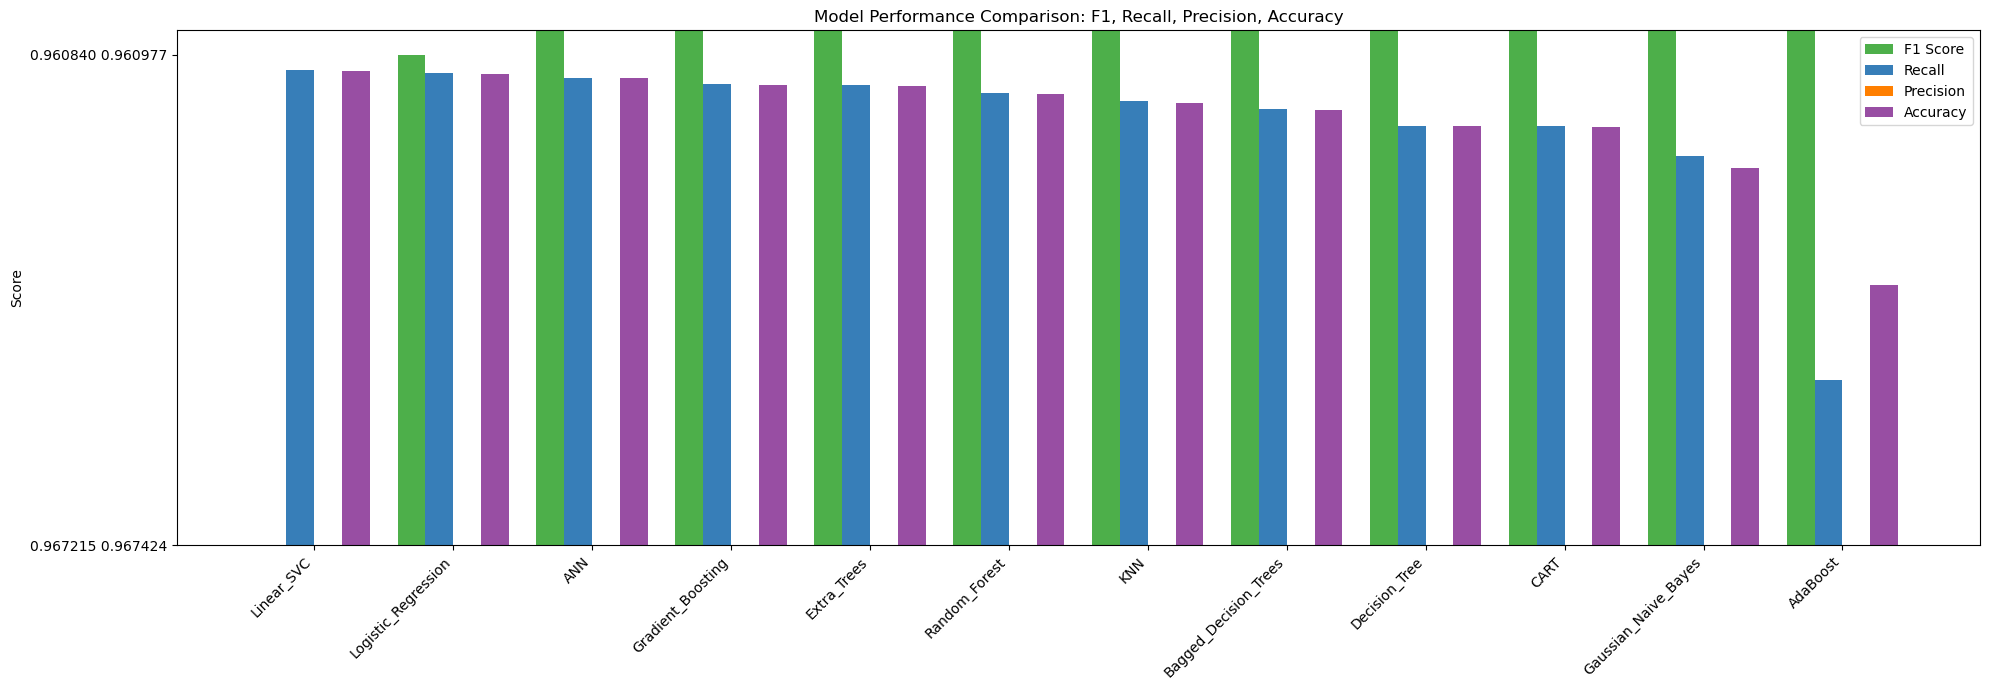

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import os

# Load model comparison data
comparison_path = os.path.join(base_path3, "model_comparison.txt")
df = pd.read_csv(comparison_path, sep="\s{2,}", engine="python")

# Set up plot
metrics = ['F1 Score', 'Recall', 'Precision', 'Accuracy']
colors = ['#4daf4a', '#377eb8', '#ff7f00', '#984ea3']
bar_width = 0.2
index = range(len(df))

plt.figure(figsize=(20, 7))

# Plot bars
for i, metric in enumerate(metrics):
    plt.bar(
        [x + i * bar_width for x in index],
        df[metric],
        width=bar_width,
        label=metric,
        color=colors[i]
    )

# X-axis settings
plt.xticks([x + 1.5 * bar_width for x in index], df['Model'], rotation=45, ha='right')
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.title("Model Performance Comparison: F1, Recall, Precision, Accuracy")
plt.legend()
plt.tight_layout()

# Save the plot
plot_path = os.path.join(base_path, "model_all_scores_comparison.png")
plt.savefig(plot_path)
plt.show()
